#CSE 353 Fall 2021 Homework 6 Jeongyoon Lee(114133199)

In [ ]:
import cv2
import numpy as  np
import matplotlib.pyplot as plt
from google.colab import drive
import glob
import math
import pandas as pd
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split

#Part 1 Nonlinear transform and overfitting/underfitting

Training Err_square for Q= 1  :  341.02214142047364
Testing Err_square for Q= 1  :  558.5515760833837


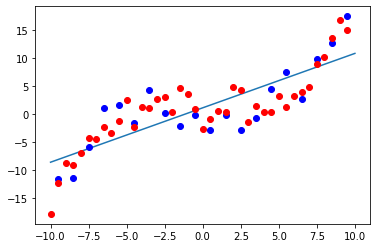

Training Err_square for Q= 3  :  112.7394032059552
Testing Err_square for Q= 3  :  158.18832808759208


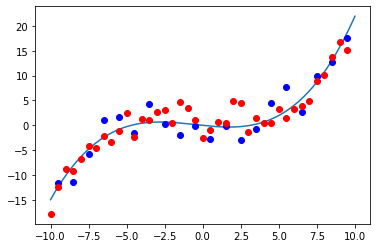

Training Err_square for Q= 6  :  74.72322354660918
Testing Err_square for Q= 6  :  306.29570705425897


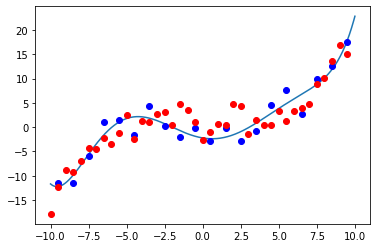

Training Err_square for Q= 10  :  60.85094298220477
Testing Err_square for Q= 10  :  523.9301945905759


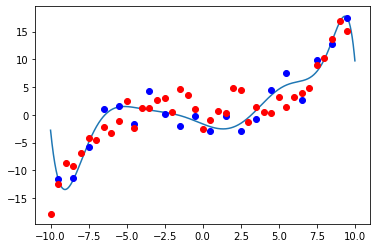

Training Err_square for Q= 19  :  1443.96760187201
Testing Err_square for Q= 19  :  174564256583.7809


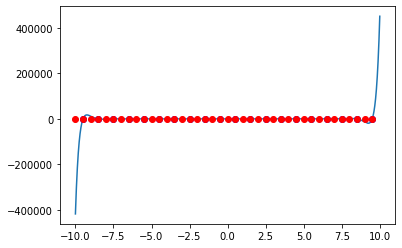

In [145]:
def model():
  # check original data
  for f in glob.glob( "TrainingData_x.txt"):
    X = np.loadtxt(f,delimiter=",") 

  for f in glob.glob( "TrainingData_y.txt"):
    Y = np.loadtxt(f,delimiter=",")
  # print(np.shape(X))
  # print(np.shape(Y))

  z = [X**0]
  X_next = X
  for i in range(Q):
    z = np.append(z,[X_next],axis = 0)
    X_next= np.multiply(X,X_next)
  z = z.T
  # print(z)
  # print(np.shape(z))  

  W_poly =  np.linalg.inv(z.T @ z) @ z.T@Y
  err_sqr = ((W_poly.T)@z.T - Y)**2
  # print(err_sqr)
  print("Training Err_square for Q=",Q," : ",err_sqr.sum())

  # print(W_poly)
  # print(np.shape(z))
  # print(np.shape(W_poly))
  # print(np.shape(W_poly.T))

  for f in glob.glob( "TestingData_x.txt"):
    Test_X = np.loadtxt(f,delimiter=",") 

  for f in glob.glob( "TestingData_y.txt"):
    Test_Y = np.loadtxt(f,delimiter=",")
  Test_z = [Test_X**0]
  Test_X_next = Test_X
  for i in range(Q):
    Test_z = np.append(Test_z,[Test_X_next],axis = 0)
    Test_X_next= np.multiply(Test_X,Test_X_next)
  Test_z = Test_z.T
  
  err_sqr = ((W_poly.T)@Test_z.T - Test_Y)**2
  # print(err_sqr)
  print("Testing Err_square for Q=",Q," : ",err_sqr.sum())
  return(W_poly)

def print_plot(W):
  W_poly = W
  plt.scatter
  Wx = np.arange(-10, 10, 0.0001)
  # Wy = [((-1)*Wm*num)-w[0]/w[2] for num in Wx]  
  Wy = 0
  for i in range(Q+1):
    Wy += W_poly[i] * np.power(Wx,i)
  plt.plot(Wx, Wy)

  for i in range(len(X)):
    plt.plot(X[i], Y[i], 'o', color='blue');
  for i in range(len(Test_X)):
    plt.plot(Test_X[i], Test_Y[i], 'o', color='red');
  plt.show(); 
  return

Q = 1
W= model()
print_plot(W)

Q = 3
W= model()
print_plot(W)

Q = 6
W= model()
print_plot(W)

Q = 10
W= model()
print_plot(W)

Q = 19
W= model()
print_plot(W)

#Part 2 Regularization

Training Err_square for Q= 6 , L= 0.1  :  74.73519896431631
Testing Err_square for Q= 6 , L= 0.1  :  302.27005458491044


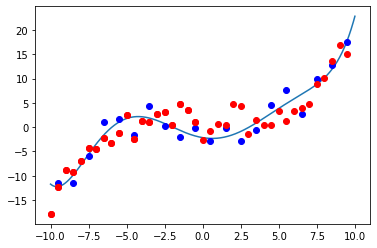


Training Err_square for Q= 6 , L= 100  :  99.01336690628663
Testing Err_square for Q= 6 , L= 100  :  174.65196623523957


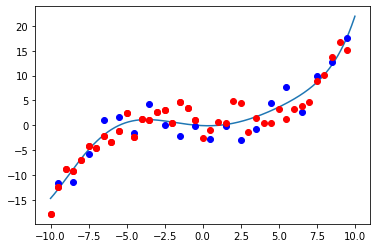

Training Err_square for Q= 12 , L= 0.1  :  59.72122347705331
Testing Err_square for Q= 12 , L= 0.1  :  1321.6039944551512


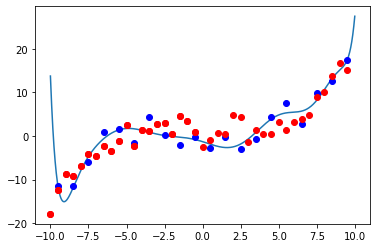


Training Err_square for Q= 12 , L= 100  :  73.16544922133673
Testing Err_square for Q= 12 , L= 100  :  915.3307381340708


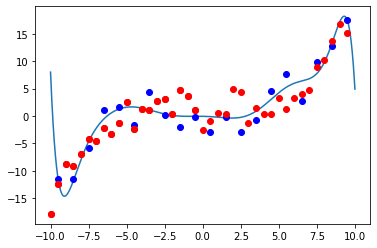

In [114]:
def model_regularization():
  # check original data
  for f in glob.glob( "TrainingData_x.txt"):
    X = np.loadtxt(f,delimiter=",") 

  for f in glob.glob( "TrainingData_y.txt"):
    Y = np.loadtxt(f,delimiter=",")
  # print(np.shape(X))
  # print(np.shape(Y))

  z = [X**0]
  # print(z)
  X_next = X
  for i in range(Q):
    z = np.append(z,[X_next],axis = 0)
    X_next= np.multiply(X,X_next)
  z = z.T
  # print(z)
  # print(np.shape(z)) 

  W_poly_star = np.linalg.inv((z.T @ z + L *I)) @ z.T @ Y # regularized W using lamda
  err_sqr = ((W_poly_star.T)@z.T - Y)**2
  # print(err_sqr)
  print("Training Err_square for Q=",Q,", L=",L," : ",err_sqr.sum())
  # print(W_poly_star)

  for f in glob.glob( "TestingData_x.txt"):
    Test_X = np.loadtxt(f,delimiter=",") 

  for f in glob.glob( "TestingData_y.txt"):
    Test_Y = np.loadtxt(f,delimiter=",")
  Test_z = [Test_X**0]
  Test_X_next = Test_X
  for i in range(Q):
    Test_z = np.append(Test_z,[Test_X_next],axis = 0)
    Test_X_next= np.multiply(Test_X,Test_X_next)
  Test_z = Test_z.T
  
  err_sqr = ((W_poly_star.T)@Test_z.T - Test_Y)**2
  # print(err_sqr)
  print("Testing Err_square for Q=",Q,", L=",L," : ",err_sqr.sum())
  return W_poly_star

def print_plot(W):
  W_poly_star = W
  plt.scatter
  Wx = np.arange(-10, 10, 0.0001)
  # Wy = [((-1)*Wm*num)-w[0]/w[2] for num in Wx]  
  Wy = 0
  for i in range(Q+1):
    Wy += W_poly_star[i] * np.power(Wx,i)
  plt.plot(Wx, Wy)

  for i in range(len(X)):
    plt.plot(X[i], Y[i], 'o', color='blue');
    plt.plot(Test_X[i], Test_Y[i], 'o', color='red');
  for i in range(len(Test_X)):
    plt.plot(Test_X[i], Test_Y[i], 'o', color='red');
  plt.show(); 
  return

Q = 6
L = 0.1
I = np.eye(Q+1)
W = model_regularization()
print_plot(W)
print()

Q = 6
L = 100
I = np.eye(Q+1)
W = model_regularization()
print_plot(W)

Q = 12
L = 0.1
I = np.eye(Q+1)
W = model_regularization()
print_plot(W)
print()

Q = 12
L = 100
I = np.eye(Q+1)
W = model_regularization()
print_plot(W)


#Part 3 Cross validation

#Leave-One-Out

Training Err_square for Q= 6 , L= 0.01  :  69.22895281469457
Validation Err_square for Q= 6 , L= 0.01  :  11.959704528259365

Training Err_square for Q= 6 , L= 0.1  :  69.24171721778775
Validation Err_square for Q= 6 , L= 0.1  :  11.978504970916902

Training Err_square for Q= 6 , L= 1  :  70.07790143482315
Validation Err_square for Q= 6 , L= 1  :  12.243661391794266

Training Err_square for Q= 6 , L= 10  :  79.83241070754715
Validation Err_square for Q= 6 , L= 10  :  14.265325821511187

Training Err_square for Q= 6 , L= 100  :  92.34648989108426
Validation Err_square for Q= 6 , L= 100  :  17.217027151067402

Training Err_square for Q= 6 , L= 1000  :  103.68015154680225
Validation Err_square for Q= 6 , L= 1000  :  19.61844546691453

Training Err_square for Q= 6 , L= 1000000  :  128.94806813175865
Validation Err_square for Q= 6 , L= 1000000  :  19.876740966049503

Testing Err_square for Q= 6 , L= 0.01  :  302.12862243895813


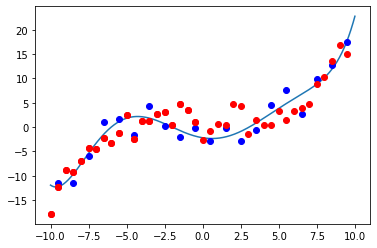

Testing Err_square for Q= 6 , L= 1000000  :  183.10807895729928


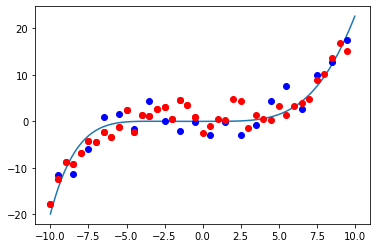



Training Err_square for Q= 10 , L= 0.01  :  54.68898161646153
Validation Err_square for Q= 10 , L= 0.01  :  185.27490126735583

Training Err_square for Q= 10 , L= 0.1  :  54.70248060035202
Validation Err_square for Q= 10 , L= 0.1  :  180.22032376859536

Training Err_square for Q= 10 , L= 1  :  55.44453017816907
Validation Err_square for Q= 10 , L= 1  :  141.7169821488414

Training Err_square for Q= 10 , L= 10  :  62.158684554081596
Validation Err_square for Q= 10 , L= 10  :  52.086194851664686

Training Err_square for Q= 10 , L= 100  :  70.45554311089899
Validation Err_square for Q= 10 , L= 100  :  17.349151945126216

Training Err_square for Q= 10 , L= 1000  :  74.23660974421918
Validation Err_square for Q= 10 , L= 1000  :  13.976245196842726

Training Err_square for Q= 10 , L= 1000000  :  84.8909578922808
Validation Err_square for Q= 10 , L= 1000000  :  46.31711999706338

Testing Err_square for Q= 10 , L= 1000  :  368.85992027134944


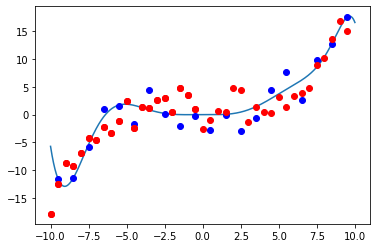

Testing Err_square for Q= 10 , L= 0.01  :  531.0069535089756


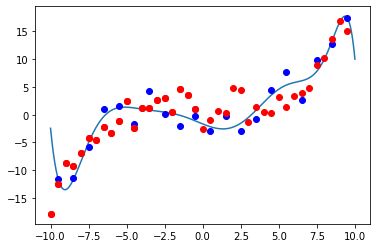

In [138]:
# check original data
for f in glob.glob( "TrainingData_x.txt"):
  X = np.loadtxt(f,delimiter=",") 

for f in glob.glob( "TrainingData_y.txt"):
  Y = np.loadtxt(f,delimiter=",")

# leave-one-out is same with v_fold when v is the size of data
# So, in this case, V = 20
def leave_one_out():
  global V
  start = -1 * num_of_iter
  end = 0
  TrainX = X
  TrainY = Y
  err_sqr_cross = 0
  err_sqr_cross_sum = 0
  err_sqr_training = 0
  err_sqr_training_sum = 0
  err_sqr_cross_min = 100000000000000000000 # should find minimum weight
  err_sqr_cross_index = 0
  min_W = 0
  for i in range(V):
    start += num_of_iter
    end += num_of_iter
    start = int(start)
    end = int(end)
    val_arr_X = TrainX[start:end]
    val_index_X = np.arange(start, end, 1)
    train_arr_X = np.delete(TrainX, val_index_X)
    val_arr_Y = TrainY[start:end]
    val_index_Y = np.arange(start, end, 1)
    train_arr_Y = np.delete(TrainY, val_index_X)
    z_cross = [train_arr_X**0]
    X_next_cross = train_arr_X
    for j in range(Q):
      z_cross = np.append(z_cross,[X_next_cross],axis = 0)
      X_next_cross= np.multiply(train_arr_X,X_next_cross)
    z_cross = z_cross.T

    W_poly_cross = np.linalg.inv((z_cross.T @ z_cross + L *I)) @ z_cross.T @ train_arr_Y
    err_sqr_training = ((W_poly_cross.T)@z_cross.T - train_arr_Y)**2
    err_sqr_training_sum += err_sqr_training

    z_cross_val = [val_arr_X**0]
    X_next_val = val_arr_X
    for k in range(Q):
      z_cross_val = np.append(z_cross_val,[X_next_val],axis = 0)
      X_next_val= np.multiply(val_arr_X,X_next_val)
    z_cross_val = z_cross_val.T

    err_sqr_cross = ((W_poly_cross.T)@z_cross_val.T - val_arr_Y)**2
    err_sqr_cross_sum += err_sqr_cross
    if(err_sqr_cross < err_sqr_cross_min):
      err_sqr_cross_min = err_sqr_cross
      min_W = W_poly_cross
  print("Training Err_square for Q=",Q,", L=",L," : ",err_sqr_training_sum.sum()/V)
  print("Validation Err_square for Q=",Q,", L=",L," : ",err_sqr_cross_sum.sum()/V)
  print()
  return min_W  

def print_plot():
  plt.scatter
  Wx = np.arange(-10, 10, 0.0001)
  # Wy = [((-1)*Wm*num)-w[0]/w[2] for num in Wx]  
  Wy = 0
  for i in range(Q+1):
    Wy += W_poly_star[i] * np.power(Wx,i)
  plt.plot(Wx, Wy)

  for i in range(len(X)):
    plt.plot(X[i], Y[i], 'o', color='blue');
    plt.plot(Test_X[i], Test_Y[i], 'o', color='red');
  for i in range(len(Test_X)):
    plt.plot(Test_X[i], Test_Y[i], 'o', color='red');
  plt.show(); 
  return

##############When Q is 6##########################
Q = 6
L = 0.01
I = np.eye(Q+1)
V = 20
num_of_iter = len(Y)/V
# print(num_of_iter)
# print("L is : ",L)
W_poly_cross1 = leave_one_out()


Q = 6
L = 0.1
I = np.eye(Q+1)
V = 20
num_of_iter = len(Y)/V
# print(num_of_iter)
# print("L is : ",L)
W_poly_cross2 = leave_one_out()

Q = 6
L = 1
I = np.eye(Q+1)
V = 20
num_of_iter = len(Y)/V
# print(num_of_iter)
# print("L is : ",L)
W_poly_cross3 = leave_one_out()

Q = 6
L = 10
I = np.eye(Q+1)
V = 20
num_of_iter = len(Y)/V
# print(num_of_iter)
# print("L is : ",L)
W_poly_cross4 = leave_one_out()

Q = 6
L = 100
I = np.eye(Q+1)
V = 20
num_of_iter = len(Y)/V
# print(num_of_iter)
# print("L is : ",L)
W_poly_cross5 = leave_one_out()

Q = 6
L = 1000
I = np.eye(Q+1)
V = 20
num_of_iter = len(Y)/V
# print(num_of_iter)
# print("L is : ",L)
W_poly_cross6 = leave_one_out()

Q = 6
L = 1000000
I = np.eye(Q+1)
V = 20
num_of_iter = len(Y)/V
# print(num_of_iter)
# print("L is : ",L)
W_poly_cross7 = leave_one_out()

# Test model with largest validation error, and smallest validation error
W_poly_star = W_poly_cross1
L = 0.01
for f in glob.glob( "TestingData_x.txt"):
  Test_X = np.loadtxt(f,delimiter=",") 

for f in glob.glob( "TestingData_y.txt"):
  Test_Y = np.loadtxt(f,delimiter=",")
Test_z = [Test_X**0]
Test_X_next = Test_X
for i in range(Q):
  Test_z = np.append(Test_z,[Test_X_next],axis = 0)
  Test_X_next= np.multiply(Test_X,Test_X_next)
Test_z = Test_z.T
  
err_sqr = ((W_poly_star.T)@Test_z.T - Test_Y)**2
print("Testing Err_square for Q=",Q,", L=",L," : ",err_sqr.sum())
print_plot()


W_poly_star = W_poly_cross7
L = 1000000
for f in glob.glob( "TestingData_x.txt"):
  Test_X = np.loadtxt(f,delimiter=",") 

for f in glob.glob( "TestingData_y.txt"):
  Test_Y = np.loadtxt(f,delimiter=",")
Test_z = [Test_X**0]
Test_X_next = Test_X
for i in range(Q):
  Test_z = np.append(Test_z,[Test_X_next],axis = 0)
  Test_X_next= np.multiply(Test_X,Test_X_next)
Test_z = Test_z.T
  
err_sqr = ((W_poly_star.T)@Test_z.T - Test_Y)**2
print("Testing Err_square for Q=",Q,", L=",L," : ",err_sqr.sum())
print_plot()


print()
print()
##############When Q is 12##########################
Q = 10
L = 0.01
I = np.eye(Q+1)
V = 20
num_of_iter = len(Y)/V
# print(num_of_iter)
# print("L is : ",L)
W_poly_cross1 = leave_one_out()


Q = 10
L = 0.1
I = np.eye(Q+1)
V = 20
num_of_iter = len(Y)/V
# print(num_of_iter)
# print("L is : ",L)
W_poly_cross2 = leave_one_out()

Q = 10
L = 1
I = np.eye(Q+1)
V = 20
num_of_iter = len(Y)/V
# print(num_of_iter)
# print("L is : ",L)
W_poly_cross3 = leave_one_out()

Q = 10
L = 10
I = np.eye(Q+1)
V = 20
num_of_iter = len(Y)/V
# print(num_of_iter)
# print("L is : ",L)
W_poly_cross4 = leave_one_out()

Q = 10
L = 100
I = np.eye(Q+1)
V = 20
num_of_iter = len(Y)/V
# print(num_of_iter)
# print("L is : ",L)
W_poly_cross5 = leave_one_out()

Q = 10
L = 1000
I = np.eye(Q+1)
V = 20
num_of_iter = len(Y)/V
# print(num_of_iter)
# print("L is : ",L)
W_poly_cross6 = leave_one_out()

Q = 10
L = 1000000
I = np.eye(Q+1)
V = 20
num_of_iter = len(Y)/V
# print(num_of_iter)
# print("L is : ",L)
W_poly_cross7 = leave_one_out()

# Test model with largest validation error, and smallest validation error
W_poly_star = W_poly_cross6
L = 1000

for f in glob.glob( "TestingData_x.txt"):
  Test_X = np.loadtxt(f,delimiter=",") 

for f in glob.glob( "TestingData_y.txt"):
  Test_Y = np.loadtxt(f,delimiter=",")
Test_z = [Test_X**0]
Test_X_next = Test_X
for i in range(Q):
  Test_z = np.append(Test_z,[Test_X_next],axis = 0)
  Test_X_next= np.multiply(Test_X,Test_X_next)
Test_z = Test_z.T
  
err_sqr = ((W_poly_star.T)@Test_z.T - Test_Y)**2
print("Testing Err_square for Q=",Q,", L=",L," : ",err_sqr.sum())
print_plot()

W_poly_star = W_poly_cross1
L = 0.01

for f in glob.glob( "TestingData_x.txt"):
  Test_X = np.loadtxt(f,delimiter=",") 

for f in glob.glob( "TestingData_y.txt"):
  Test_Y = np.loadtxt(f,delimiter=",")
Test_z = [Test_X**0]
Test_X_next = Test_X
for i in range(Q):
  Test_z = np.append(Test_z,[Test_X_next],axis = 0)
  Test_X_next= np.multiply(Test_X,Test_X_next)
Test_z = Test_z.T
  
err_sqr = ((W_poly_star.T)@Test_z.T - Test_Y)**2
print("Testing Err_square for Q=",Q,", L=",L," : ",err_sqr.sum())
print_plot()

#V-fold

Training Err_square for Q= 6 , L= 0.01  :  54.55153485001254
Validation Err_square for Q= 6 , L= 0.01  :  7131.6116899246135

Training Err_square for Q= 6 , L= 0.1  :  54.590319687956914
Validation Err_square for Q= 6 , L= 0.1  :  7314.874160599093

Training Err_square for Q= 6 , L= 1  :  55.93670173722734
Validation Err_square for Q= 6 , L= 1  :  8798.355547209332

Training Err_square for Q= 6 , L= 10  :  64.35558323761245
Validation Err_square for Q= 6 , L= 10  :  13077.252456171544

Training Err_square for Q= 6 , L= 100  :  73.769753524043
Validation Err_square for Q= 6 , L= 100  :  15838.13734297254

Training Err_square for Q= 6 , L= 1000  :  80.28924100937536
Validation Err_square for Q= 6 , L= 1000  :  15891.45366156143

Training Err_square for Q= 6 , L= 1000000  :  98.26275047546656
Validation Err_square for Q= 6 , L= 1000000  :  3043.6252856001224

Testing Err_square for Q= 6 , L= 1000  :  160.93981993653867


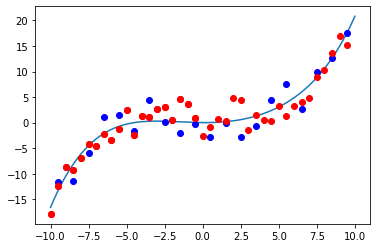

Testing Err_square for Q= 6 , L= 1000000  :  183.18363213955303


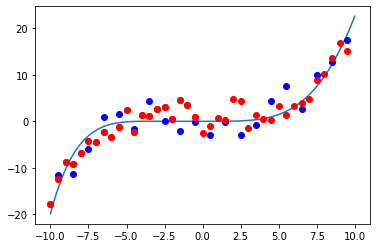



Training Err_square for Q= 10 , L= 0.01  :  33.052738665382385
Validation Err_square for Q= 10 , L= 0.01  :  199312531.7023789

Training Err_square for Q= 10 , L= 0.1  :  33.19217824753819
Validation Err_square for Q= 10 , L= 0.1  :  194999144.81961828

Training Err_square for Q= 10 , L= 1  :  34.14569097385878
Validation Err_square for Q= 10 , L= 1  :  166230205.5076119

Training Err_square for Q= 10 , L= 10  :  39.139387736165816
Validation Err_square for Q= 10 , L= 10  :  82925527.08482367

Training Err_square for Q= 10 , L= 100  :  47.508074560365856
Validation Err_square for Q= 10 , L= 100  :  26823270.154681634

Training Err_square for Q= 10 , L= 1000  :  52.78082725398881
Validation Err_square for Q= 10 , L= 1000  :  16833332.747765012

Training Err_square for Q= 10 , L= 1000000  :  64.27358853922786
Validation Err_square for Q= 10 , L= 1000000  :  652025.0975851931

Testing Err_square for Q= 10 , L= 0.01  :  415.06464435695364


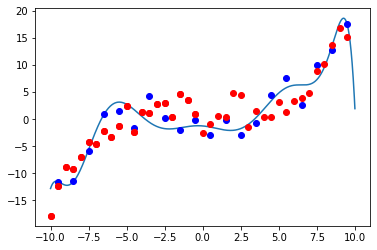

Testing Err_square for Q= 10 , L= 1000000  :  651.0580627450136


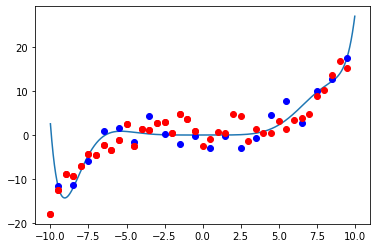

In [144]:
# check original data
for f in glob.glob( "TrainingData_x.txt"):
  X = np.loadtxt(f,delimiter=",") 

for f in glob.glob( "TrainingData_y.txt"):
  Y = np.loadtxt(f,delimiter=",")

def slice_array():
  global V
  start = -1 * num_of_iter
  end = 0
  TrainX = X
  TrainY = Y
  err_sqr_cross = 0
  err_sqr_cross_sum = 0
  err_sqr_training = 0
  err_sqr_training_sum = 0
  err_sqr_cross_min = 100000000000000000000
  err_sqr_cross_index = 0
  min_W = 0
  for i in range(V):
    # train_arr_X, val_arr_X, train_arr_Y, val_arr_Y = train_test_split(X, Y, test_size=1/V, shuffle=True)
    start += num_of_iter
    end += num_of_iter
    start = int(start)
    end = int(end)
    val_arr_X = TrainX[start:end]
    val_index_X = np.arange(start, end, 1)
    train_arr_X = np.delete(TrainX, val_index_X)
    val_arr_Y = TrainY[start:end]
    val_index_Y = np.arange(start, end, 1)
    train_arr_Y = np.delete(TrainY, val_index_X)
    z_cross = [train_arr_X**0]
    X_next_cross = train_arr_X

    for j in range(Q):
      z_cross = np.append(z_cross,[X_next_cross],axis = 0)
      X_next_cross= np.multiply(train_arr_X,X_next_cross)
    z_cross = z_cross.T

    W_poly_cross = np.linalg.inv((z_cross.T @ z_cross + L *I)) @ z_cross.T @ train_arr_Y
    err_sqr_training = ((W_poly_cross.T)@z_cross.T - train_arr_Y)**2
    err_sqr_training_sum += err_sqr_training

    z_cross_val = [val_arr_X**0]
    X_next_val = val_arr_X
    for k in range(Q):
      z_cross_val = np.append(z_cross_val,[X_next_val],axis = 0)
      X_next_val= np.multiply(val_arr_X,X_next_val)
    z_cross_val = z_cross_val.T

    err_sqr_cross = ((W_poly_cross.T)@z_cross_val.T - val_arr_Y)**2
    err_sqr_cross_sum += err_sqr_cross
    if(err_sqr_cross.sum() < err_sqr_cross_min):
      err_sqr_cross_min = err_sqr_cross.sum()
      min_W = W_poly_cross
  print("Training Err_square for Q=",Q,", L=",L," : ",err_sqr_training_sum.sum()/V)
  print("Validation Err_square for Q=",Q,", L=",L," : ",err_sqr_cross_sum.sum()/V)
  print()
  return min_W


def print_plot():
  plt.scatter
  Wx = np.arange(-10, 10, 0.0001)
  # Wy = [((-1)*Wm*num)-w[0]/w[2] for num in Wx]  
  Wy = 0
  for i in range(Q+1):
    Wy += W_poly_star[i] * np.power(Wx,i)
  plt.plot(Wx, Wy)

  for i in range(len(X)):
    plt.plot(X[i], Y[i], 'o', color='blue');
    plt.plot(Test_X[i], Test_Y[i], 'o', color='red');
  for i in range(len(Test_X)):
    plt.plot(Test_X[i], Test_Y[i], 'o', color='red');
  plt.show(); 
  return


##############When Q is 6##########################
Q = 6
L = 0.01
I = np.eye(Q+1)
V = 5
num_of_iter = len(Y)/V
# print(num_of_iter)
# print("L is : ",L)
W_poly_cross1 = slice_array()


Q = 6
L = 0.1
I = np.eye(Q+1)
V = 5
num_of_iter = len(Y)/V
# print(num_of_iter)
# print("L is : ",L)
W_poly_cross2 = slice_array()

Q = 6
L = 1
I = np.eye(Q+1)
V = 5
num_of_iter = len(Y)/V
# print(num_of_iter)
# print("L is : ",L)
W_poly_cross3 = slice_array()

Q = 6
L = 10
I = np.eye(Q+1)
V = 5
num_of_iter = len(Y)/V
# print(num_of_iter)
# print("L is : ",L)
W_poly_cross4 = slice_array()

Q = 6
L = 100
I = np.eye(Q+1)
V = 5
num_of_iter = len(Y)/V
# print(num_of_iter)
# print("L is : ",L)
W_poly_cross5 = slice_array()

Q = 6
L = 1000
I = np.eye(Q+1)
V = 5
num_of_iter = len(Y)/V
# print(num_of_iter)
# print("L is : ",L)
W_poly_cross6 = slice_array()

Q = 6
L = 1000000
I = np.eye(Q+1)
V = 5
num_of_iter = len(Y)/V
# print(num_of_iter)
# print("L is : ",L)
W_poly_cross7 = slice_array()

# Test model with largest validation error, and smallest validation error
W_poly_star = W_poly_cross6
L = 1000
for f in glob.glob( "TestingData_x.txt"):
  Test_X = np.loadtxt(f,delimiter=",") 

for f in glob.glob( "TestingData_y.txt"):
  Test_Y = np.loadtxt(f,delimiter=",")
Test_z = [Test_X**0]
Test_X_next = Test_X
for i in range(Q):
  Test_z = np.append(Test_z,[Test_X_next],axis = 0)
  Test_X_next= np.multiply(Test_X,Test_X_next)
Test_z = Test_z.T
  
err_sqr = ((W_poly_star.T)@Test_z.T - Test_Y)**2
print("Testing Err_square for Q=",Q,", L=",L," : ",err_sqr.sum())
print_plot()


W_poly_star = W_poly_cross7
L = 1000000
for f in glob.glob( "TestingData_x.txt"):
  Test_X = np.loadtxt(f,delimiter=",") 

for f in glob.glob( "TestingData_y.txt"):
  Test_Y = np.loadtxt(f,delimiter=",")
Test_z = [Test_X**0]
Test_X_next = Test_X
for i in range(Q):
  Test_z = np.append(Test_z,[Test_X_next],axis = 0)
  Test_X_next= np.multiply(Test_X,Test_X_next)
Test_z = Test_z.T
  
err_sqr = ((W_poly_star.T)@Test_z.T - Test_Y)**2
print("Testing Err_square for Q=",Q,", L=",L," : ",err_sqr.sum())
print_plot()


print()
print()
##############When Q is 12##########################
Q = 10
L = 0.01
I = np.eye(Q+1)
V = 5
num_of_iter = len(Y)/V
# print(num_of_iter)
# print("L is : ",L)
W_poly_cross1 = slice_array()


Q = 10
L = 0.1
I = np.eye(Q+1)
V = 5
num_of_iter = len(Y)/V
# print(num_of_iter)
# print("L is : ",L)
W_poly_cross2 = slice_array()

Q = 10
L = 1
I = np.eye(Q+1)
V = 5
num_of_iter = len(Y)/V
# print(num_of_iter)
# print("L is : ",L)
W_poly_cross3 = slice_array()

Q = 10
L = 10
I = np.eye(Q+1)
V = 5
num_of_iter = len(Y)/V
# print(num_of_iter)
# print("L is : ",L)
W_poly_cross4 = slice_array()

Q = 10
L = 100
I = np.eye(Q+1)
V = 5
num_of_iter = len(Y)/V
# print(num_of_iter)
# print("L is : ",L)
W_poly_cross5 = slice_array()

Q = 10
L = 1000
I = np.eye(Q+1)
V = 5
num_of_iter = len(Y)/V
# print(num_of_iter)
# print("L is : ",L)
W_poly_cross6 = slice_array()

Q = 10
L = 1000000
I = np.eye(Q+1)
V = 5
num_of_iter = len(Y)/V
# print(num_of_iter)
# print("L is : ",L)
W_poly_cross7 = slice_array()

# Test model with largest validation error, and smallest validation error
W_poly_star = W_poly_cross1
L = 0.01

for f in glob.glob( "TestingData_x.txt"):
  Test_X = np.loadtxt(f,delimiter=",") 

for f in glob.glob( "TestingData_y.txt"):
  Test_Y = np.loadtxt(f,delimiter=",")
Test_z = [Test_X**0]
Test_X_next = Test_X
for i in range(Q):
  Test_z = np.append(Test_z,[Test_X_next],axis = 0)
  Test_X_next= np.multiply(Test_X,Test_X_next)
Test_z = Test_z.T
  
err_sqr = ((W_poly_star.T)@Test_z.T - Test_Y)**2
print("Testing Err_square for Q=",Q,", L=",L," : ",err_sqr.sum())
print_plot()

W_poly_star = W_poly_cross7
L = 1000000

for f in glob.glob( "TestingData_x.txt"):
  Test_X = np.loadtxt(f,delimiter=",") 

for f in glob.glob( "TestingData_y.txt"):
  Test_Y = np.loadtxt(f,delimiter=",")
Test_z = [Test_X**0]
Test_X_next = Test_X
for i in range(Q):
  Test_z = np.append(Test_z,[Test_X_next],axis = 0)
  Test_X_next= np.multiply(Test_X,Test_X_next)
Test_z = Test_z.T
  
err_sqr = ((W_poly_star.T)@Test_z.T - Test_Y)**2
print("Testing Err_square for Q=",Q,", L=",L," : ",err_sqr.sum())
print_plot()